# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [4]:
# Importing the numpy library, which is used for numerical operations, especially with arrays and matrices.
import numpy as np
# Importing the matplotlib.pyplot library, which is used for plotting graphs and visualizations.
import matplotlib.pyplot as plt
# Importing the pandas library, which is used for data manipulation and analysis.
import pandas as pd

## Importing the dataset

In [3]:
# Reading a CSV file named 'Social_Network_Ads.csv' into a pandas DataFrame.
# This dataset likely contains information about users and their activity on a social network, including the ads they've interacted with.
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
# Selecting specific columns from the dataset to be used as features (independent variables).
# Here, we are selecting the 3rd and 4th columns (index 2 and 3), which likely represent some features (e.g., Age and Estimated Salary).
X = dataset.iloc[:, [2, 3]].values
# Selecting the target variable (dependent variable) from the dataset.
# Here, we are selecting the last column (the column with the index -1), which likely represents the 'Purchased' or 'Clicked' label.
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
# Importing the train_test_split function from sklearn.model_selection.
# This function is used to split the dataset into training and test sets.
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and test sets.
# X represents the feature matrix (independent variables), y represents the target vector (dependent variable).
# test_size = 0.25 indicates that 25% of the data will be used for testing, and the remaining 75% will be used for training.
# random_state = 0 ensures the result is reproducible by fixing the random seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [6]:
# Importing the StandardScaler class from sklearn.preprocessing.
# This class is used to scale the features, ensuring they have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
# Creating an instance of StandardScaler to scale the features.
sc = StandardScaler()
# Fitting the StandardScaler to the training data and transforming it.
# This scales the training features (X_train) to have a mean of 0 and a standard deviation of 1.
X_train = sc.fit_transform(X_train)
# Applying the same transformation to the test data using the already fitted scaler.
# This ensures the test data is scaled based on the training set's scaling parameters.
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [7]:
# Importing the KNeighborsClassifier class from sklearn.neighbors.
# This classifier implements the k-nearest neighbors algorithm, which is used for classification tasks.
from sklearn.neighbors import KNeighborsClassifier
# Initializing the KNeighborsClassifier with specific parameters.
# n_neighbors = 5 indicates that the model will consider the 5 closest neighbors when making predictions.
# metric = 'minkowski' specifies the distance metric used to calculate the distance between data points.
# p = 2 indicates the use of the Euclidean distance, which is a special case of Minkowski distance.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# Fitting the KNN classifier to the training data.
# This trains the model using the features (X_train) and target (y_train) from the training set.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [8]:
# Using the trained classifier to make predictions on the test set (X_test).
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [10]:
# Importing the confusion_matrix function from sklearn.metrics to evaluate model performance.
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix by comparing the actual and predicted labels.
cm = confusion_matrix(y_test, y_pred)
# Printing the confusion matrix to display the classification results.
print(cm)

[[64  4]
 [ 3 29]]


## Visualising the Training set results

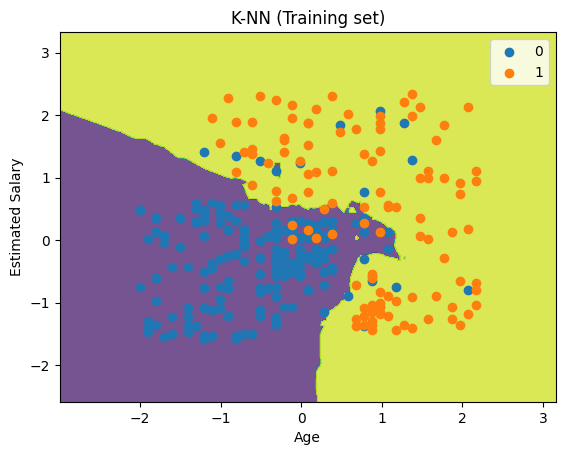

In [12]:
# Importing ListedColormap from matplotlib.colors to create custom color maps.
from matplotlib.colors import ListedColormap
# Importing ListedColormap from matplotlib.colors to create custom color maps.
from matplotlib.colors import ListedColormap
# Defining the training set and target variable for visualization.
X_set, y_set = X_train, y_train
# Creating a mesh grid for plotting the decision boundary.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# Plotting the decision boundary using contourf to fill the regions with colors.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
# Setting the axis limits to match the mesh grid.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plotting the training points on the contour plot.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 label = j)
# Adding title and axis labels to the plot.
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# Displaying the legend and the plot.
plt.legend()
plt.show()

## Visualising the Test set results

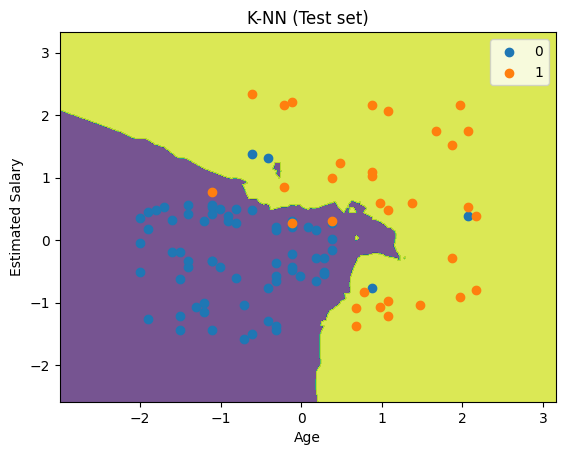

In [13]:
# Importing ListedColormap from matplotlib.colors to create custom color maps for the plot.
from matplotlib.colors import ListedColormap
# Assigning the test set data and target labels for visualization.
X_set, y_set = X_test, y_test
# Creating a mesh grid for the feature space, similar to the previous visualization.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# Plotting the decision boundary for the test set using contourf.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
# Setting the limits for the axes to match the grid range.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plotting the actual test set data points on top of the decision boundary.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                label = j)
# Adding the title and axis labels to the plot.
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# Displaying the legend and showing the plot.
plt.legend()
plt.show()